Student Performance Indicator

Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages


Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('data/stud.csv')

Show Top 5 Records

In [3]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

Shape of the dataset

In [4]:
df.shape

(1000, 8)

2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

3.1 Check Missing values

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Observation: There is no missing values in the dataset

3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

Observation: There are no duplicates values in the data set

3.3 Check data types

In [10]:
#Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.4 Checking the number of unique values of each column

In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

3.5 Check statistics of data set

In [13]:
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Insight
- From about description of numerical data(score values), all means are very close to each other - between 66 and 68.05
- All standard deviations are also close - between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher =10, and for reading min even higher = 17 

3.7 Exploring Data

In [14]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [15]:
print("Categorie in 'gender' variable : ",df['gender'].unique())
print("Categorie in 'race_ethnicity' variable : ",df['race_ethnicity'].unique())
print("Categorie in 'parental_level_of_education' variable : ",df['parental_level_of_education'].unique())
print("Categorie in 'lunch' variable : ",df['lunch'].unique())
print("Categorie in 'test_preparation_course' variable : ",df['test_preparation_course'].unique())

Categorie in 'gender' variable :  ['female' 'male']
Categorie in 'race_ethnicity' variable :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categorie in 'parental_level_of_education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorie in 'lunch' variable :  ['standard' 'free/reduced']
Categorie in 'test_preparation_course' variable :  ['none' 'completed']


In [17]:
df['test_preparation_course'].dtype,df['math_score'].dtype

(dtype('O'), dtype('int64'))

In [18]:
#define numerical & categorical column
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype =='O']

print("there are {} numeric feature {}".format(len(numeric_features),numeric_features))
print("there are {} categorical feature {}".format(len(categorical_features),categorical_features))


there are 3 numeric feature ['math_score', 'reading_score', 'writing_score']
there are 5 categorical feature ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


3.8 Adding columns for "Total Score" and "Average"
- "Total Score" and "Average" are the output features.

From here, we can solve 2 problem statements:
1. what is the total score ? (create a model to predict the total score)
2. what is the average score ? (create a model to predict the average score)

In [19]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [27]:
reading_full=df[df['reading_score']==100]
writing_full=df[df['writing_score']==100]
math_full=df[df['math_score']==100]
print(f'Number of students with full marks in reading : {reading_full.shape[0]}')
print(f'Number of students with full marks in writing : {writing_full.shape[0]}')
print(f'Number of students with full marks in math : {math_full.shape[0]}')


Number of students with full marks in reading : 17
Number of students with full marks in writing : 14
Number of students with full marks in math : 7


In [29]:
reading_less20=df[df['reading_score']<=20]
writing_less20=df[df['writing_score']<=20]
math_less20=df[df['math_score']<=20]
print(f'Number of students with full marks in reading less than 20 : {reading_less20.shape[0]}')
print(f'Number of students with full marks in writing less than 20 : {writing_less20.shape[0]}')
print(f'Number of students with full marks in math less than 20 : {math_less20.shape[0]}')

Number of students with full marks in reading less than 20 : 1
Number of students with full marks in writing less than 20 : 3
Number of students with full marks in math less than 20 : 4


Insights
- From above values, we get students have performed the worst in Maths
- Best perfomance is in reading section

4. Exploring Data ( Visualization )


4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE) : KDE represents the data using a continuous probability density curve in one or more dimensions

4.1.1 Histogram & KDE

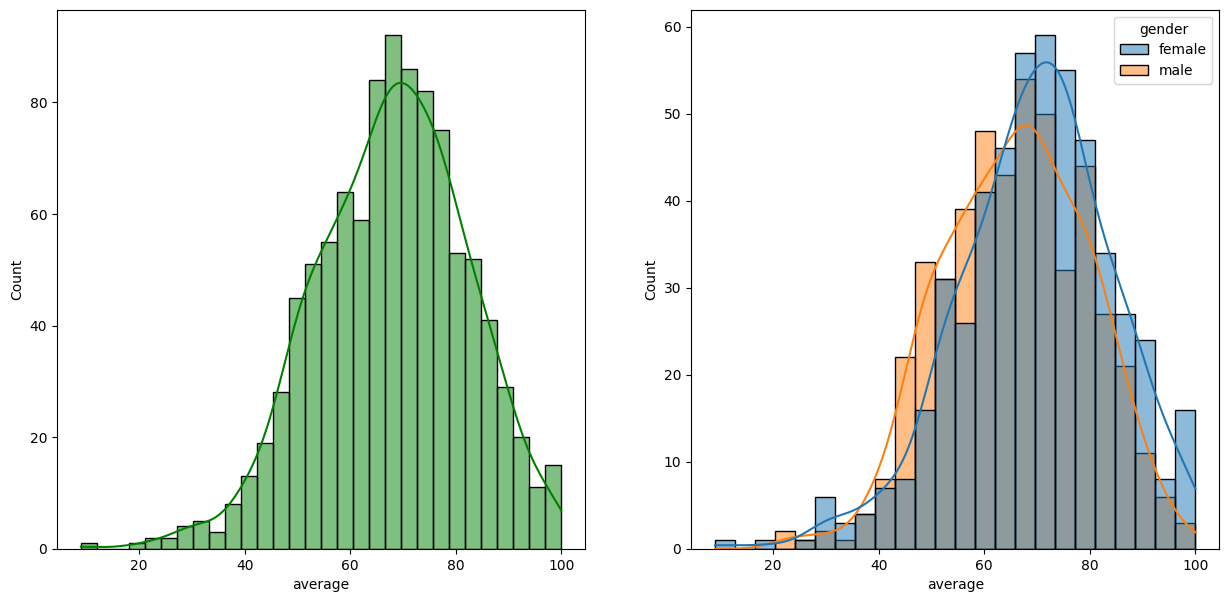

In [31]:
#average score against gender
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121) #the figure has 1 row, 2 columns, and this plot is the first plot. #that the two plots will be displayed side-by-side of each other
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122) #the figure has 1 row, 2 columns, and this plot is the second plot.
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

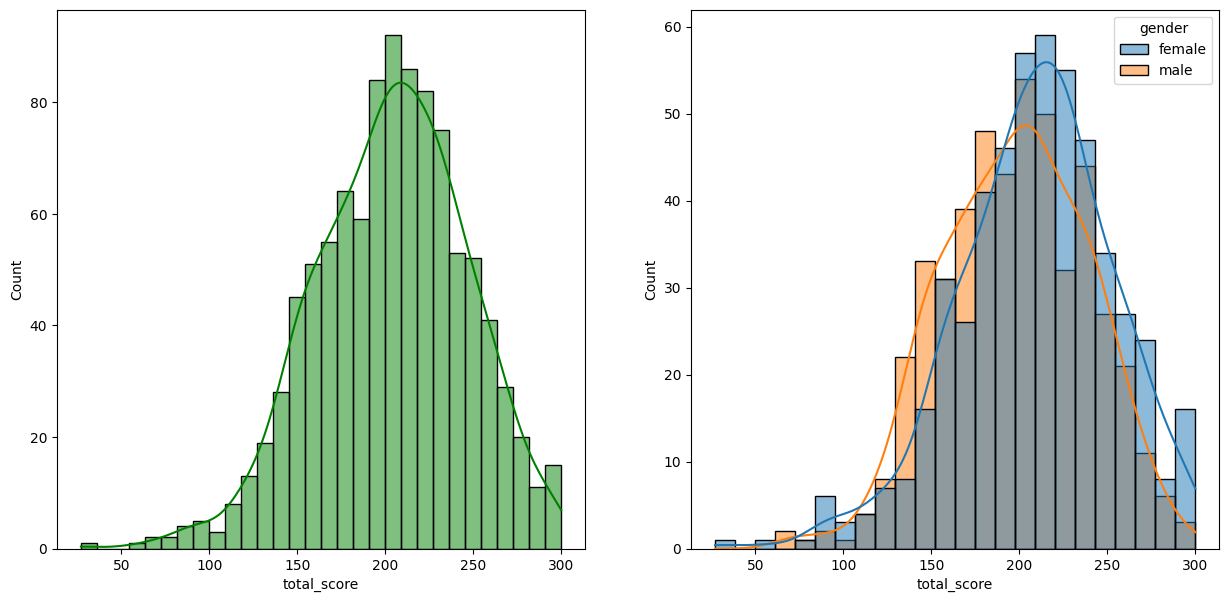

In [32]:
#total score against gender
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121) #the figure has 1 row, 2 columns, and this plot is the first plot. #that the two plots will be displayed side-by-side of each other
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122) #the figure has 1 row, 2 columns, and this plot is the second plot.
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Insights
- Female students tend to perform well than male students


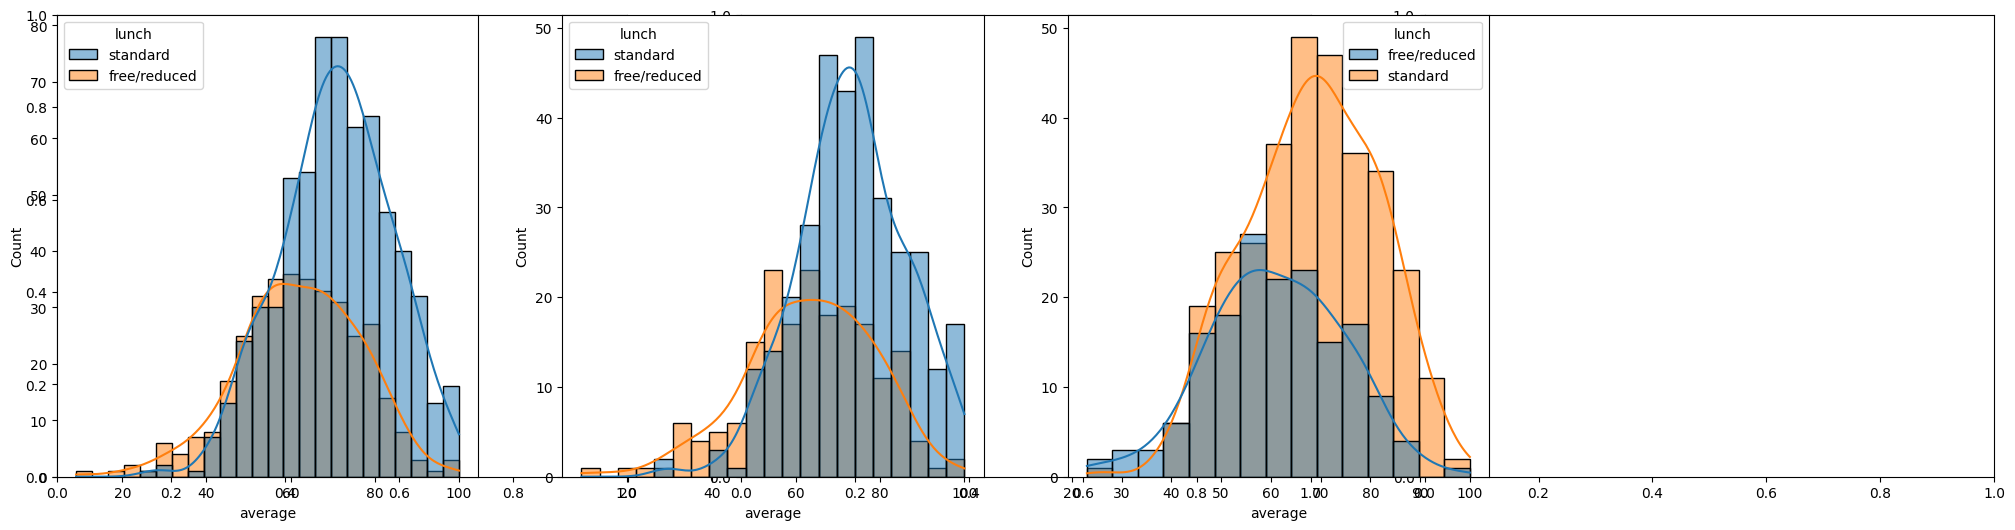

In [34]:
#average score against lunch (for diff gender)
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141) #the figure has 1 row, 4 columns, and this plot is the first plot. #that the two plots will be displayed side-by-side of each other
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142) #the figure has 1 row, 4 columns, and this plot is the second plot.
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143) #the figure has 1 row, 4 columns, and this plot is the third plot.
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights
- Standard lunch helps perform well in exams
- Standard lunch helps perform well in exams be it a male or a female

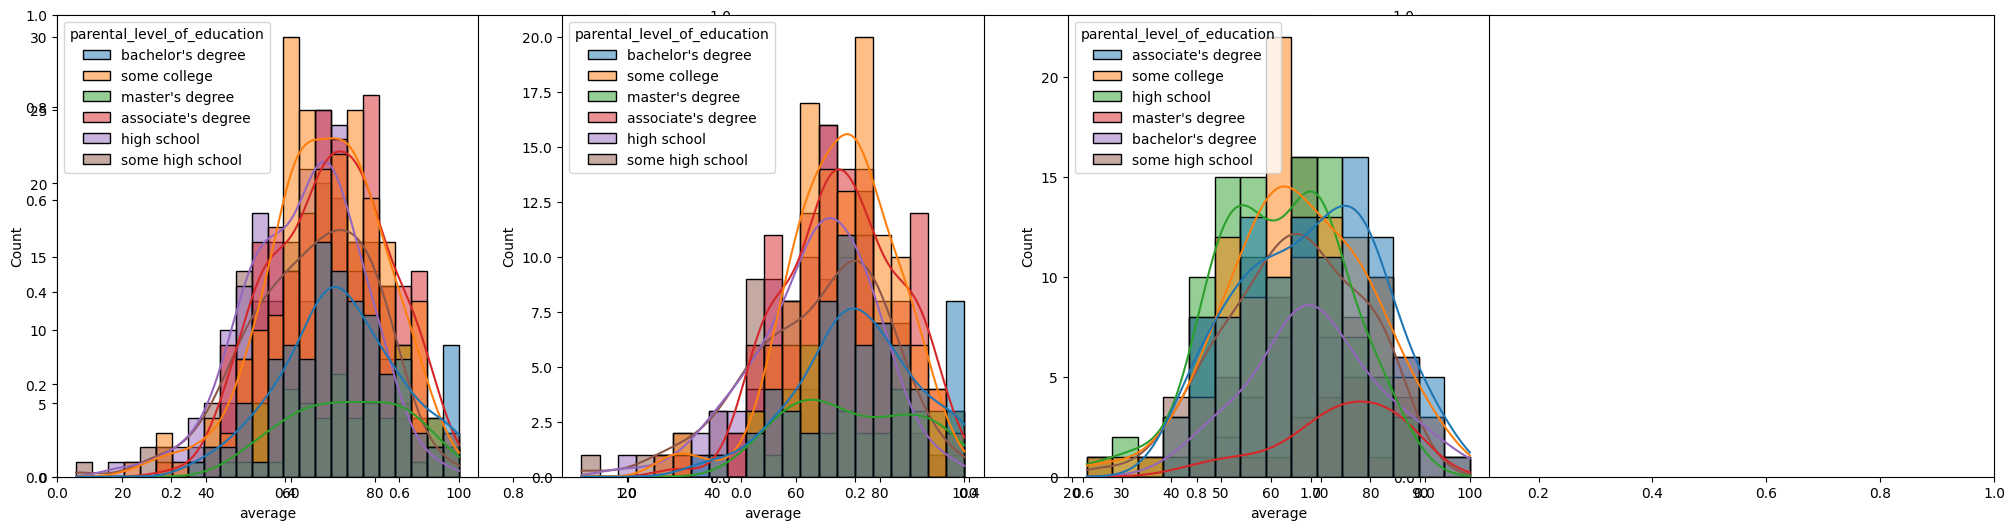

In [35]:
#average score against parental_level_of_education (for diff gender)
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141) #the figure has 1 row, 4 columns, and this plot is the first plot. #that the two plots will be displayed side-by-side of each other
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142) #the figure has 1 row, 4 columns, and this plot is the second plot.
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143) #the figure has 1 row, 4 columns, and this plot is the third plot.
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

Insights
- In general, parent's education don't help student perform well in exam
- 2nd plot we can see there is no effect of parent's education on female students.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam (pink & blue bar is higher for score above 80)

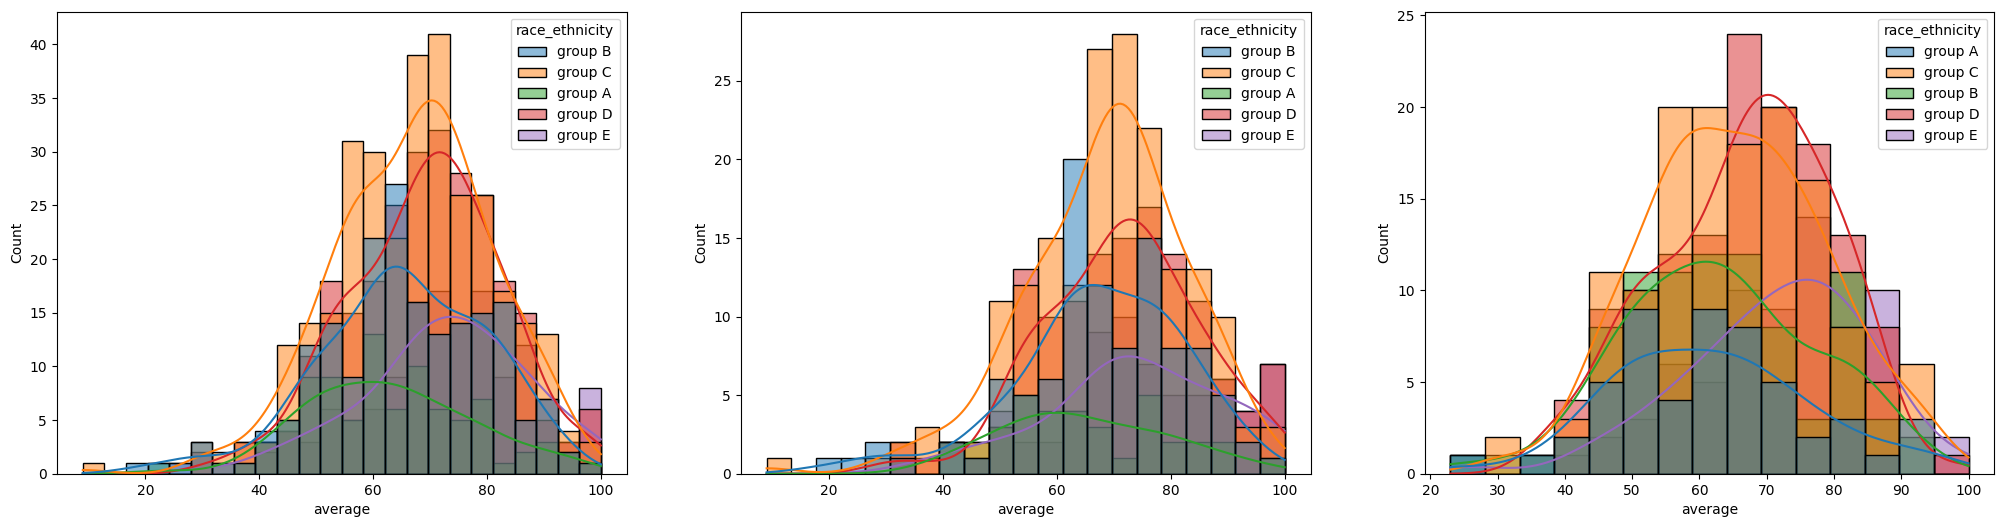

In [38]:
#average score against race_ethnicity (for diff gender)
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131) #the figure has 1 row, 3 columns, and this plot is the first plot. #that the two plots will be displayed side-by-side of each other
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132) #the figure has 1 row, 3 columns, and this plot is the second plot.
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133) #the figure has 1 row, 3 columns, and this plot is the third plot.
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights
- Students of group A and group B tend to perform poorly in exam
- Students of group A and group B tend to perform poorly in exam irrespective of whether they are male or female

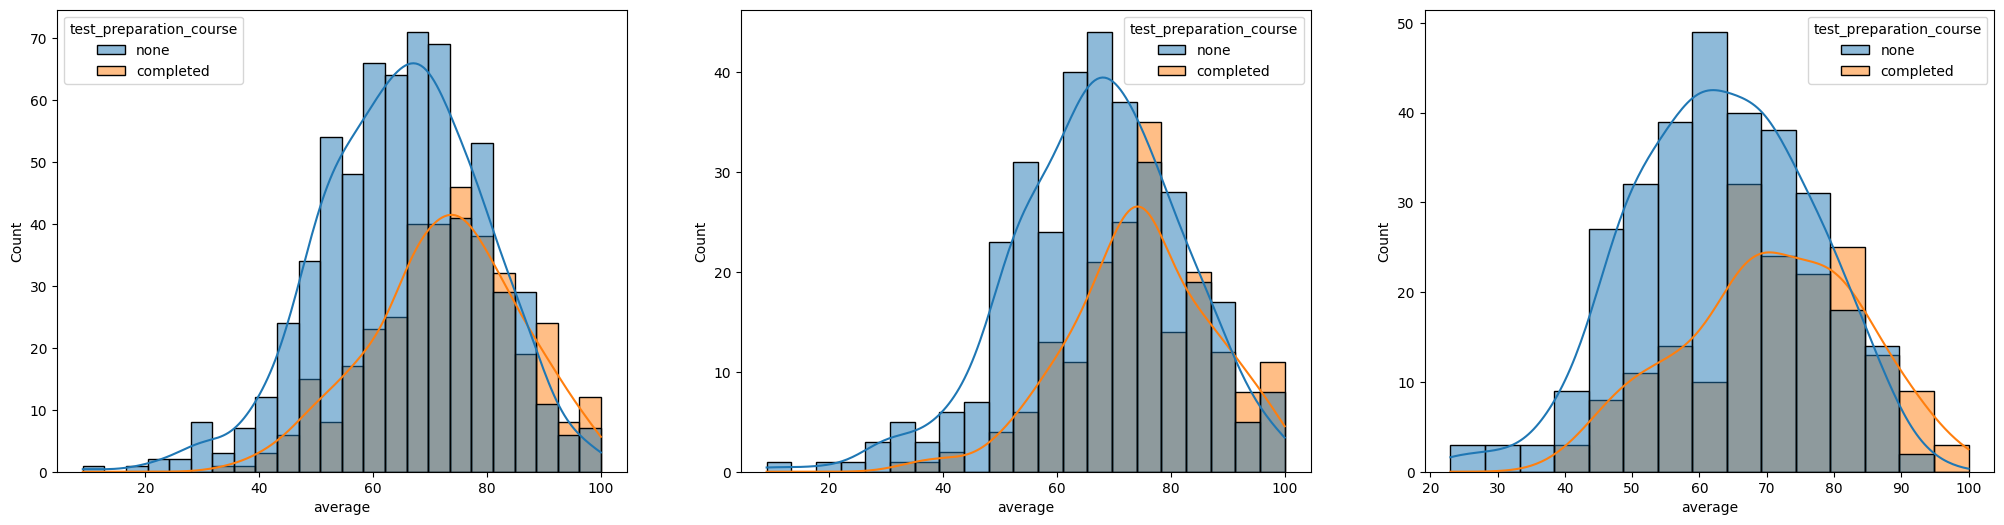

In [39]:
#average score against test_preparation_course (for diff gender)
fig, axs = plt.subplots(1,3,figsize=(25,6))
plt.subplot(131) #the figure has 1 row, 3 columns, and this plot is the first plot. #that the two plots will be displayed side-by-side of each other
sns.histplot(data=df,x='average',kde=True,hue='test_preparation_course')
plt.subplot(132) #the figure has 1 row, 3 columns, and this plot is the second plot.
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='test_preparation_course')
plt.subplot(133) #the figure has 1 row, 3 columns, and this plot is the third plot.
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='test_preparation_course')
plt.show()

Insights
- In general, test_preparation_course don't really help student perform well in exam

4.2 Maximum score range of students in all three subjects

<Axes: title={'center': 'WRITING SCORES'}, ylabel='writing_score'>

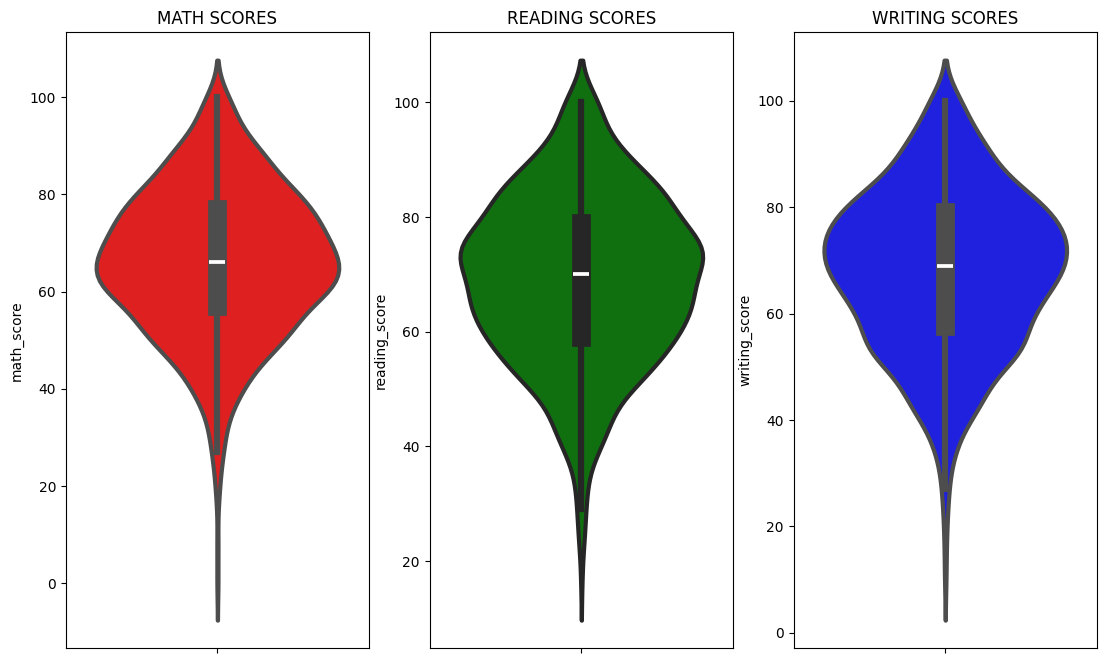

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("MATH SCORES")
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("READING SCORES")
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("WRITING SCORES")
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)

Insights
- From the above 3 plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

In [60]:
df['gender'].value_counts().index.tolist()

['female', 'male']

In [64]:
size = df['gender'].value_counts()
type(size)

pandas.core.series.Series

In [65]:
# printing names and count using loop. 
labels=[]
size=[]
for idx, name in enumerate(df['gender'].value_counts().index.tolist()): 
    print('Name :', name) 
    labels.append(name)
    print('gender :', df['gender'].value_counts()[idx]) 
    size.append(df['gender'].value_counts()[idx])

Name : female
gender : 518
Name : male
gender : 482


In [68]:
labels,size

(['female', 'male'], [518, 482])

4.3 Multivariate analysis using pieplot

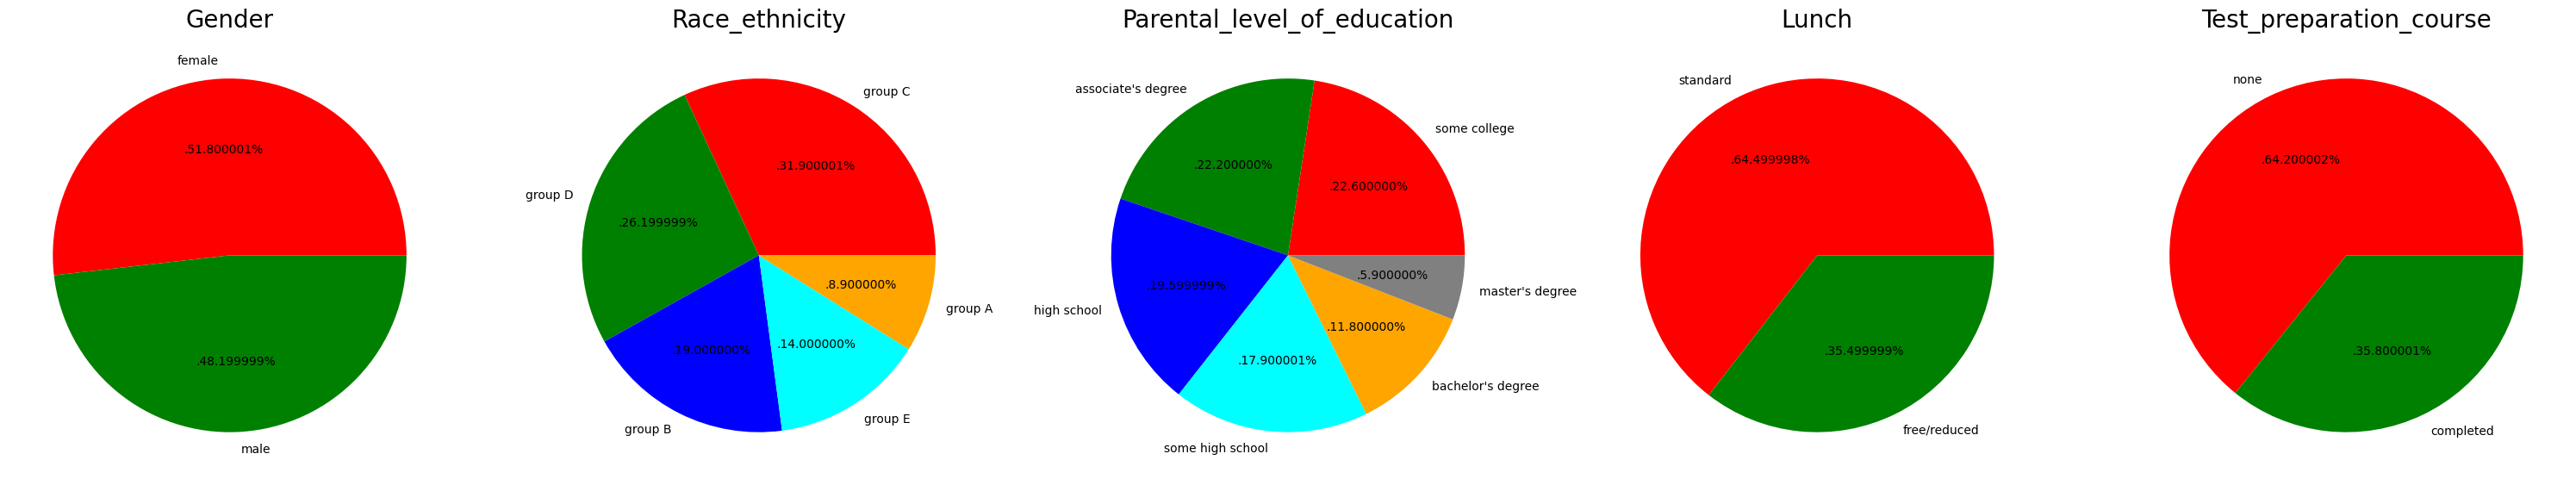

In [102]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
color=['red','green']

labels=df['gender'].value_counts().index
size=df['gender'].value_counts()

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
color=['red','green','blue','cyan','orange']

labels=df['race_ethnicity'].value_counts().index
size=df['race_ethnicity'].value_counts()

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Race_ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
color=['red','green','blue','cyan','orange','grey']

labels=df['parental_level_of_education'].value_counts().index
size=df['parental_level_of_education'].value_counts()

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Parental_level_of_education',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
color=['red','green']

labels=df['lunch'].value_counts().index
size=df['lunch'].value_counts()

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test_preparation_course'].value_counts()
labels=df['test_preparation_course'].value_counts().index
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Test_preparation_course',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


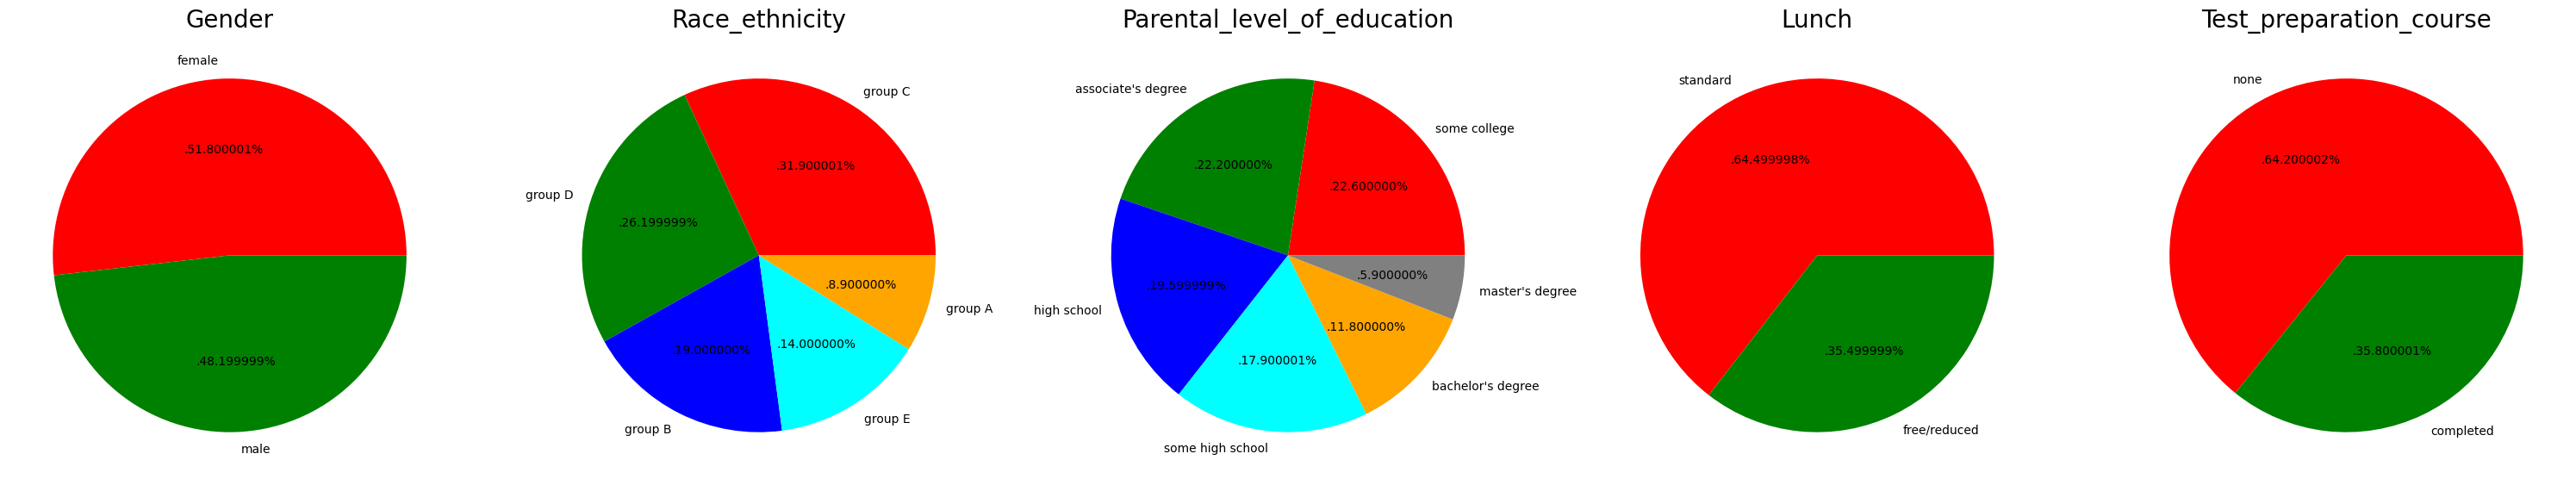

In [70]:
# plt.rcParams['figure.figsize']=(30,12)

# plt.subplot(1,5,1)
# color=['red','green']

# labels=[]
# size=[]
# for idx, name in enumerate(df['gender'].value_counts().index.tolist()): 
#     labels.append(name)
#     size.append(df['gender'].value_counts()[idx])

# plt.pie(pd.Series(size),colors=color,labels=labels,autopct='.%2f%%')
# plt.title('Gender',fontsize=20)
# plt.axis('off')

# plt.subplot(1,5,2)
# color=['red','green','blue','cyan','orange']

# labels=[]
# size=[]
# for idx, name in enumerate(df['race_ethnicity'].value_counts().index.tolist()): 
#     labels.append(name)
#     size.append(df['race_ethnicity'].value_counts()[idx])

# plt.pie(pd.Series(size),colors=color,labels=labels,autopct='.%2f%%')
# plt.title('Race_ethnicity',fontsize=20)
# plt.axis('off')

# plt.subplot(1,5,3)
# color=['red','green','blue','cyan','orange','grey']

# labels=[]
# size=[]
# for idx, name in enumerate(df['parental_level_of_education'].value_counts().index.tolist()): 
#     labels.append(name)
#     size.append(df['parental_level_of_education'].value_counts()[idx])

# plt.pie(pd.Series(size),colors=color,labels=labels,autopct='.%2f%%')
# plt.title('Parental_level_of_education',fontsize=20)
# plt.axis('off')

# plt.subplot(1,5,4)
# color=['red','green']

# labels=[]
# size=[]
# for idx, name in enumerate(df['lunch'].value_counts().index.tolist()): 
#     labels.append(name)
#     size.append(df['lunch'].value_counts()[idx])

# plt.pie(pd.Series(size),colors=color,labels=labels,autopct='.%2f%%')
# plt.title('Lunch',fontsize=20)
# plt.axis('off')

# plt.subplot(1,5,5)
# size = df['test_preparation_course'].value_counts()
# labels='none', 'completed'
# color=['red','green']

# labels=[]
# size=[]
# for idx, name in enumerate(df['test_preparation_course'].value_counts().index.tolist()): 
#     labels.append(name)
#     size.append(df['test_preparation_course'].value_counts()[idx])

# plt.pie(pd.Series(size),colors=color,labels=labels,autopct='.%2f%%')
# plt.title('Test_preparation_course',fontsize=20)
# plt.axis('off')

# plt.tight_layout()
# plt.grid()

# plt.show()


Insights
- Number of Male and Female students are almost equal
- Number of students are greatest in group C
- Number of students who parental education is "Some College" is greater followed closely by "Associate's Degree" 
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater

4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

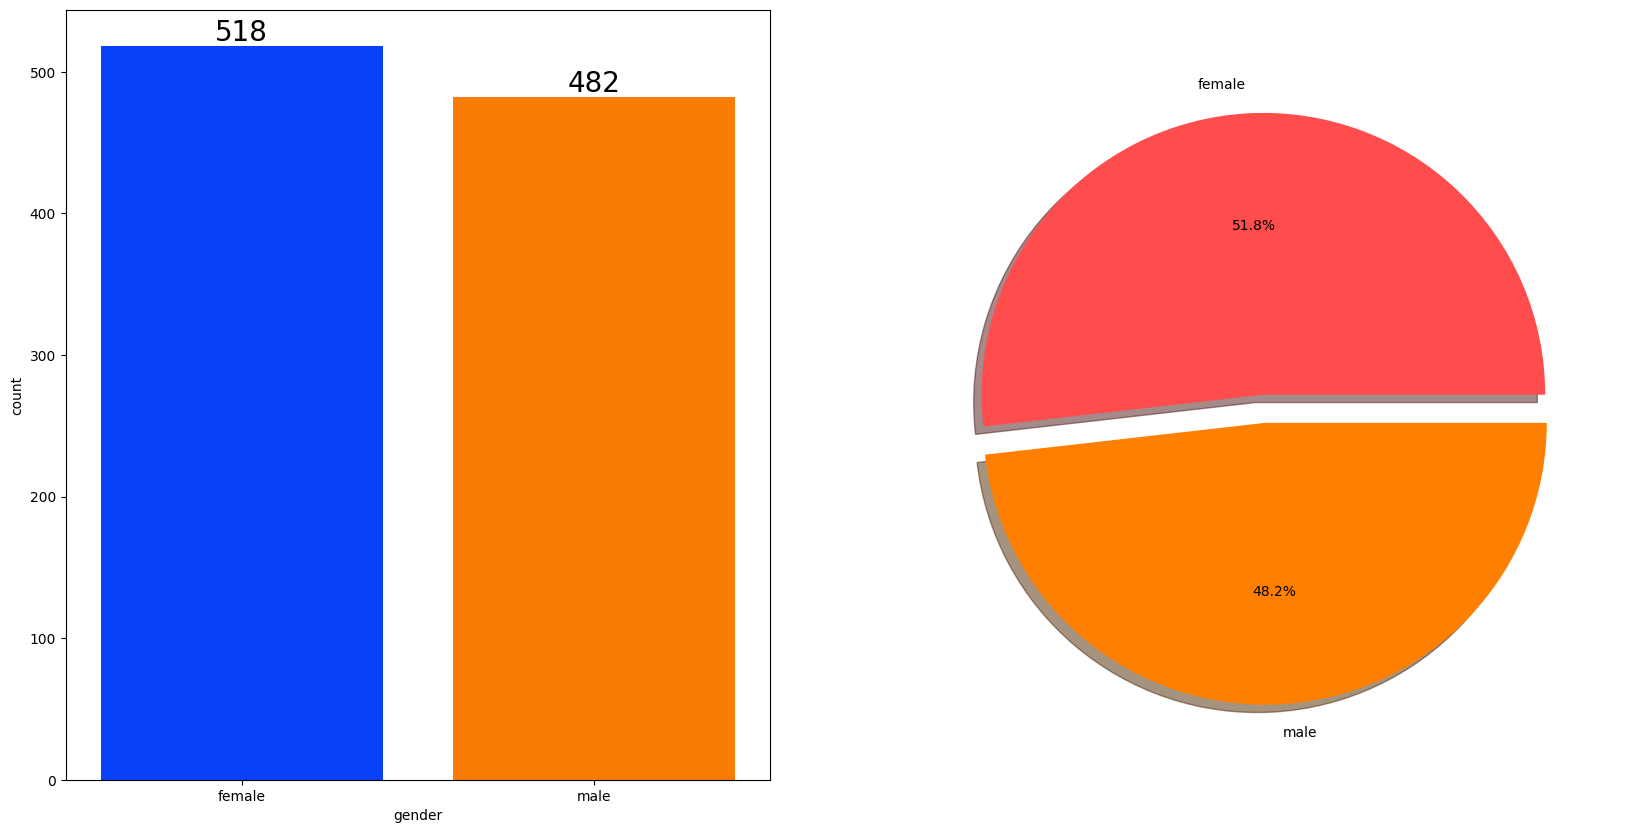

In [50]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['female','male'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
- Gender has balanced data with female students are 518(52%) and male students are 482(48%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [106]:
gender_group = df.groupby('gender')

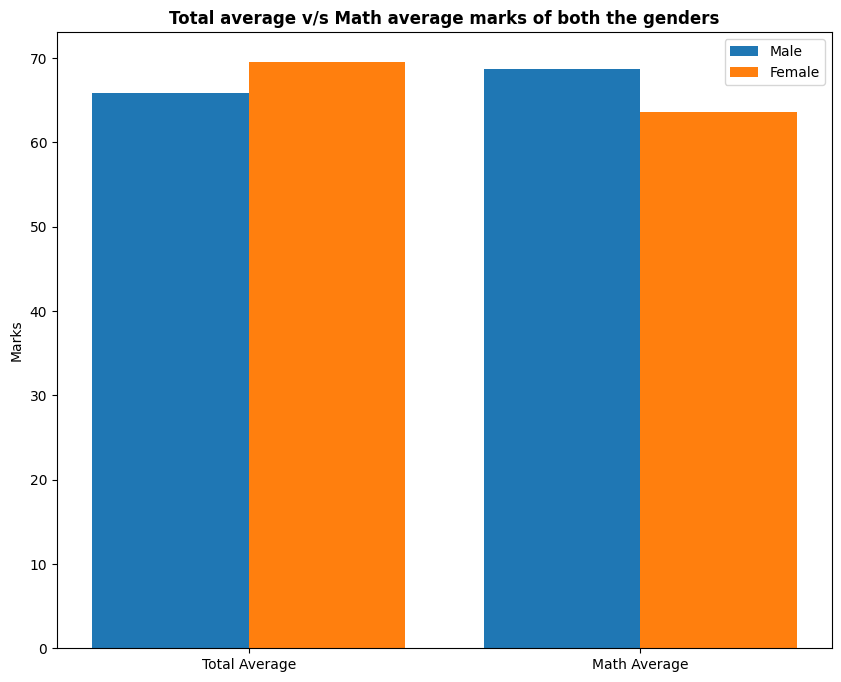

In [110]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group.get_group('female')['average'].mean(), gender_group.get_group('female')['math_score'].mean()]
male_scores = [gender_group.get_group('male')['average'].mean(), gender_group.get_group('male')['math_score'].mean()]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
- On an average females have a better overall score than man, whereas males have scored higher in Math.

4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

In [101]:
df['race_ethnicity'].value_counts()

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

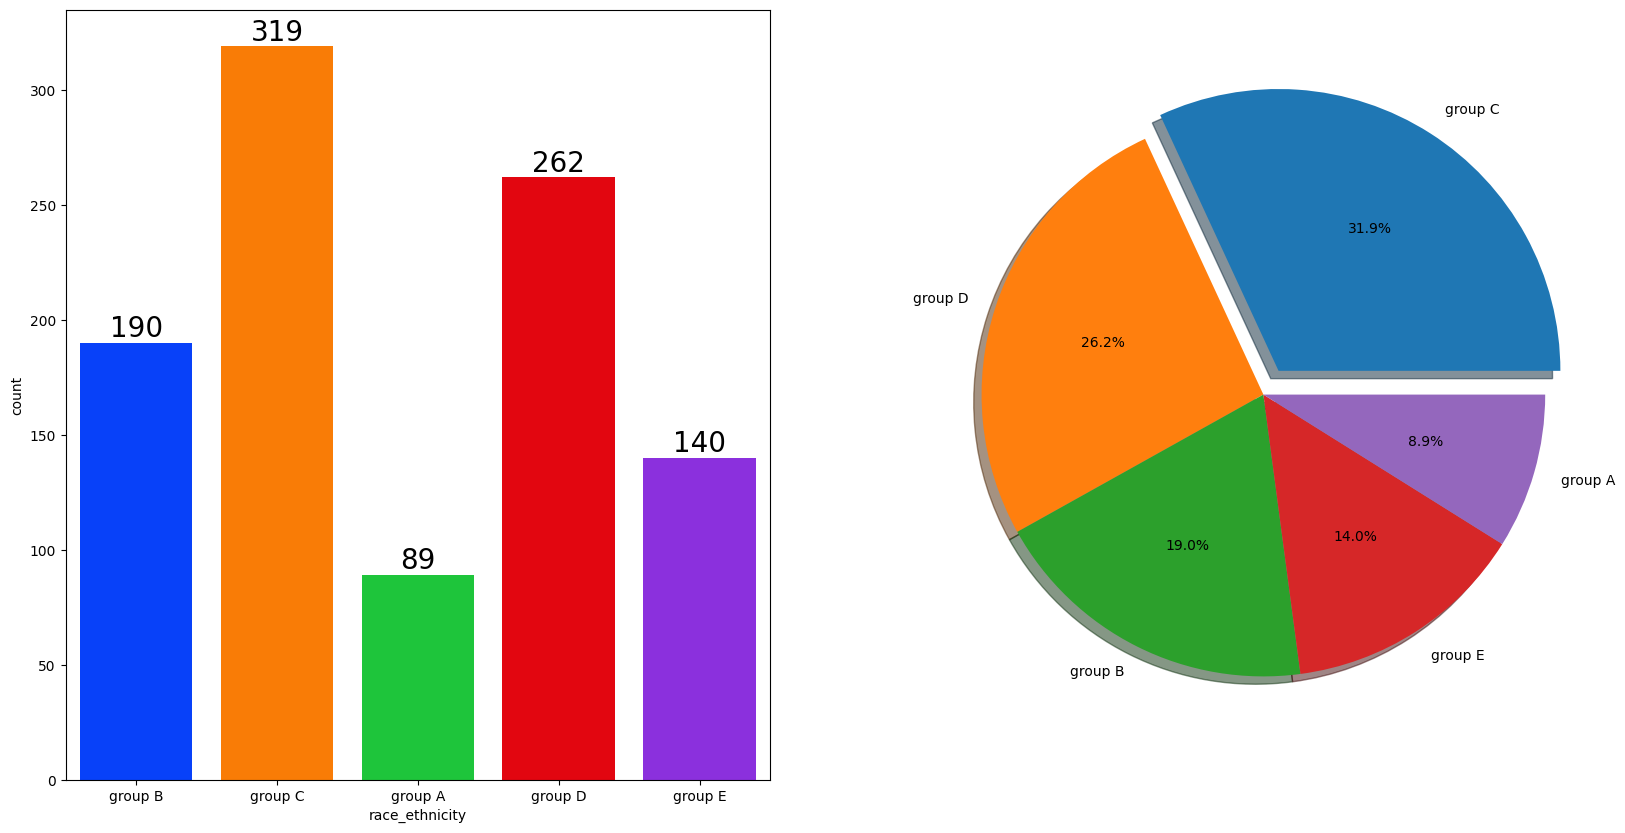

In [100]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

Insights
- Most of the student belonging from group C/group D
- Lowest number of students belong to group A

BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

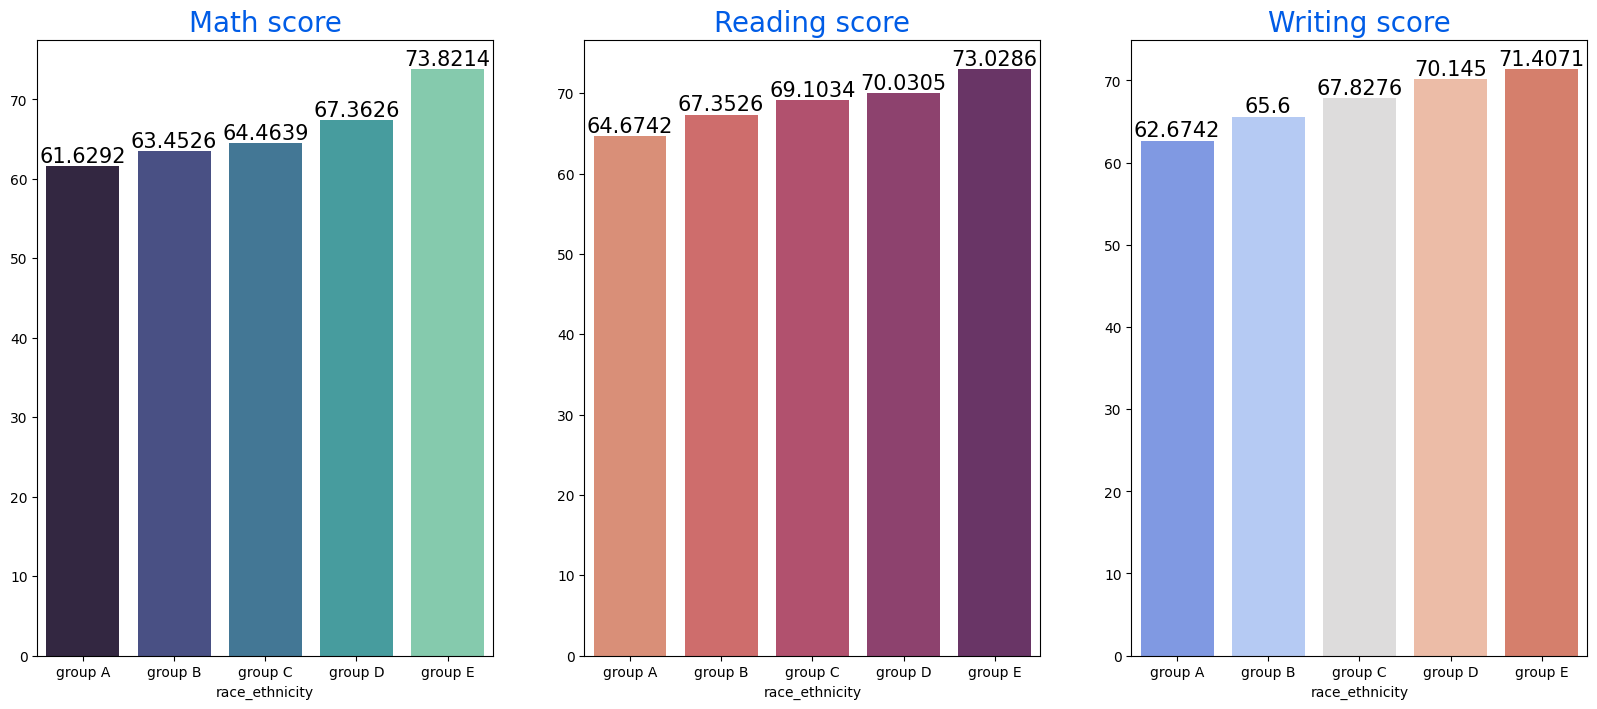

In [105]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
- Group E students have scored the highest marks
- Group A students have scored the lowest marks
- Student from a lower Socioeconomic status have a lower avg in all course subjects(?)

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

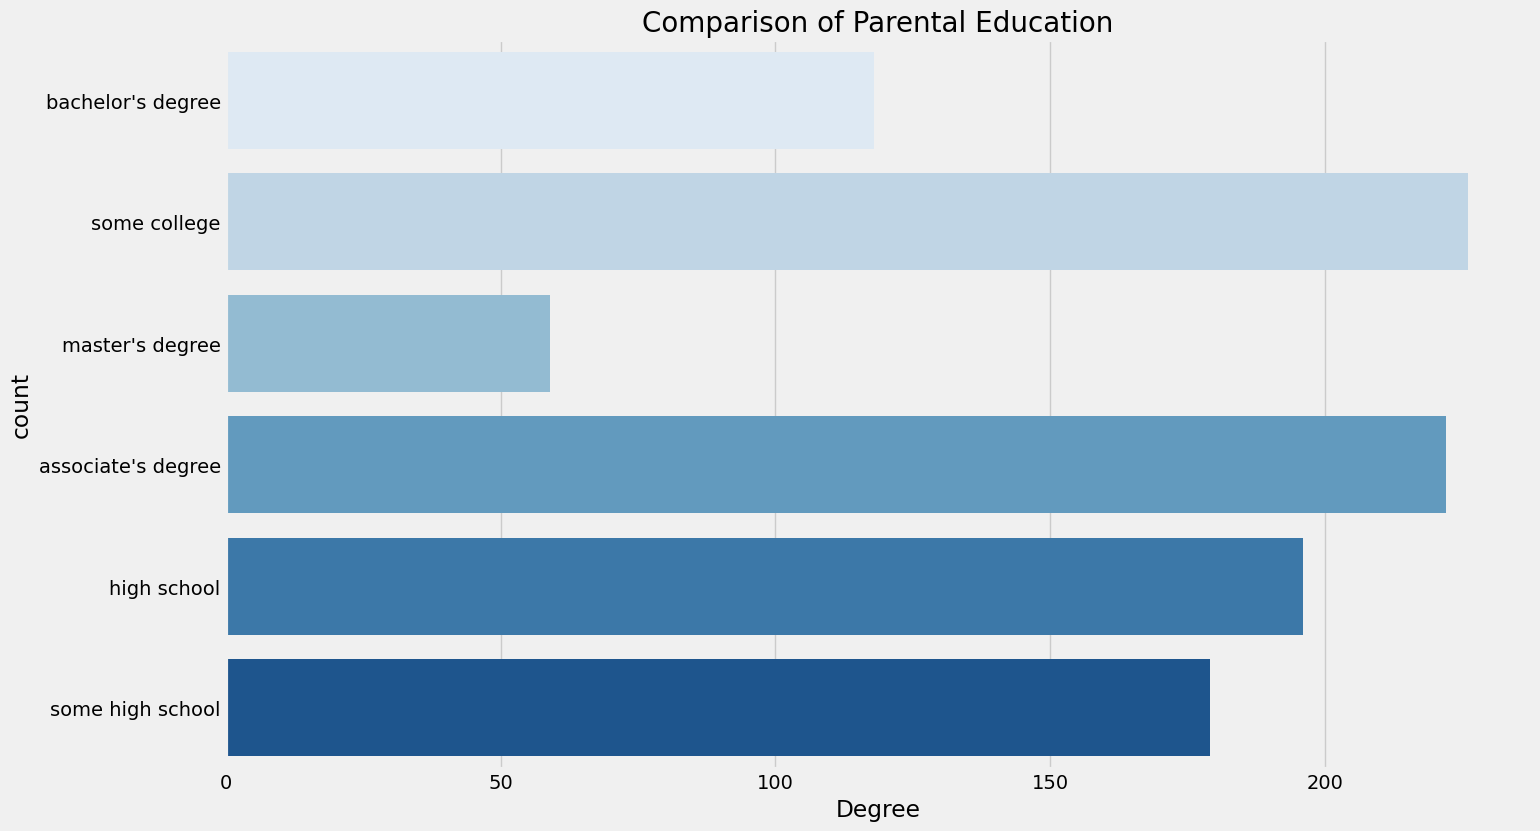

In [112]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights
- Largest number of parents are from some college.

BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

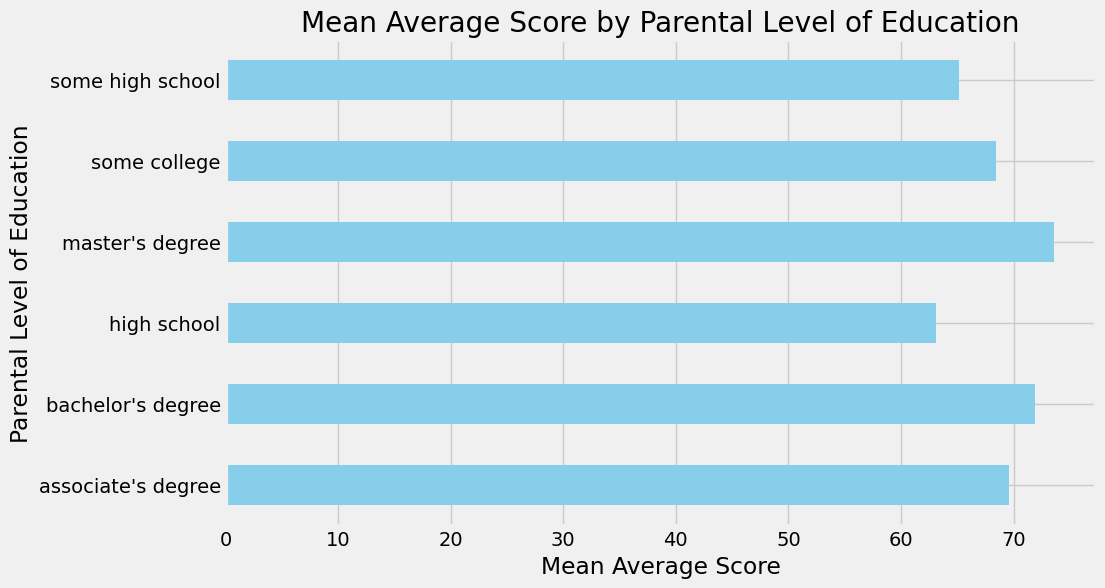

In [116]:
import matplotlib.pyplot as plt

# Group by 'parental_level_of_education' and calculate the mean of 'average' column
parent_edu_mean = df.groupby('parental_level_of_education')['average'].mean()

# Plot the mean against 'parental_level_of_education'
plt.figure(figsize=(10, 6))
parent_edu_mean.plot(kind='barh', color='skyblue')
plt.xlabel('Mean Average Score')
plt.ylabel('Parental Level of Education')
plt.title("Mean Average Score by Parental Level of Education")
plt.show()



Insights
- The score of student whose parents possess master and bachelor level education are higher than others.

4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

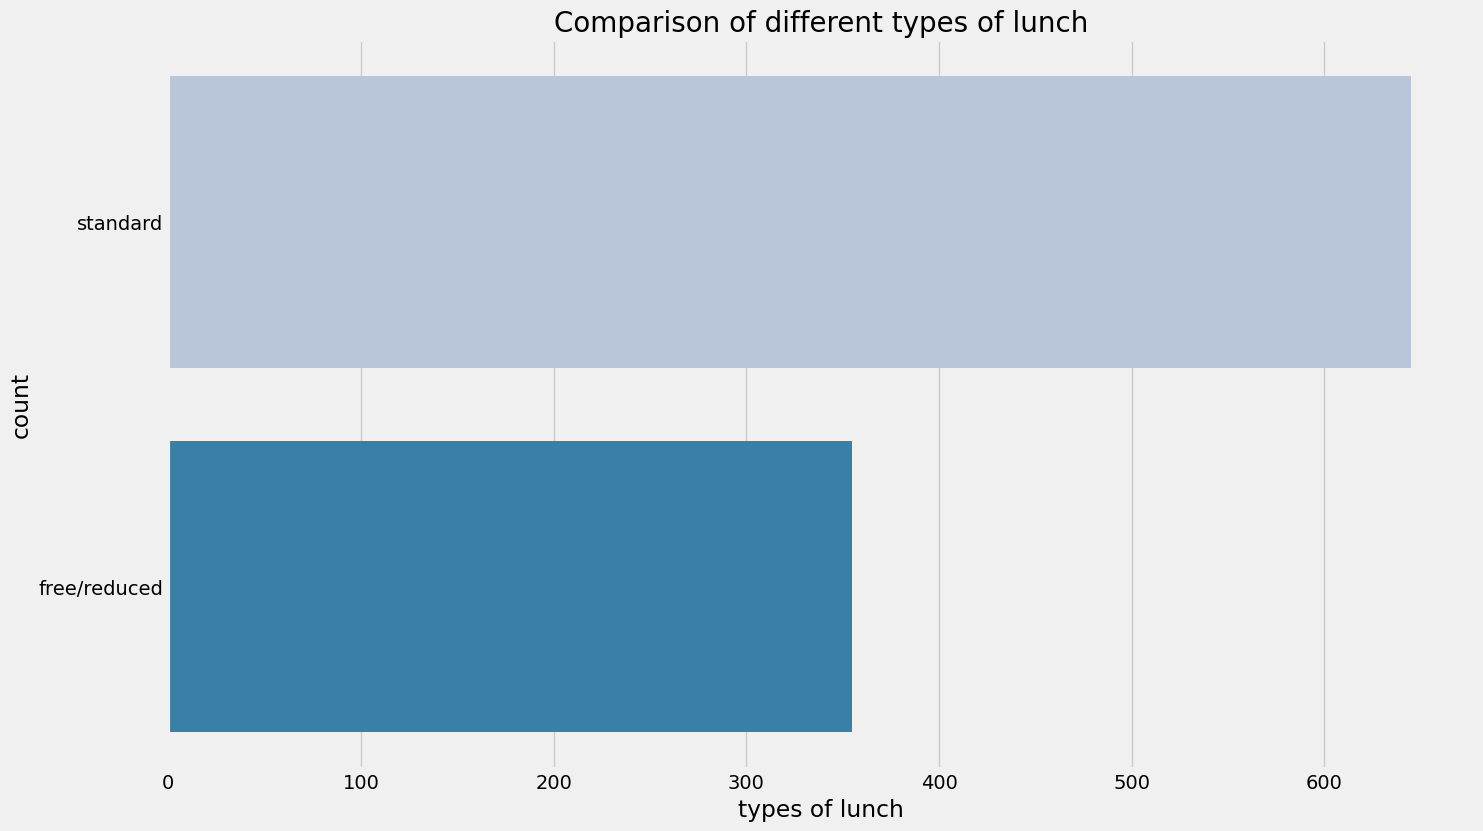

In [120]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights
- Students being served Standard lunch was more than free lunch.

BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

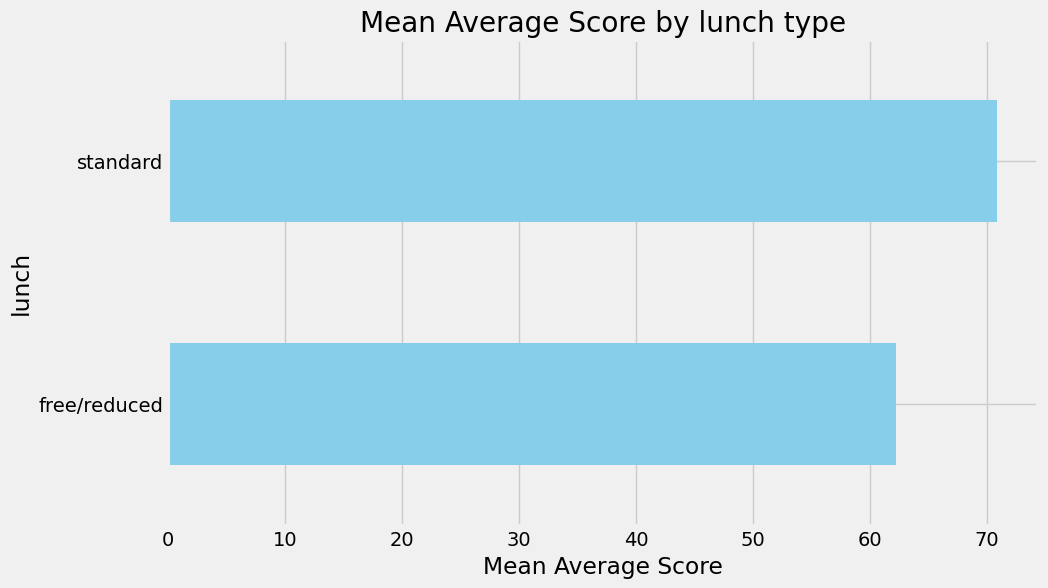

In [124]:
import matplotlib.pyplot as plt

# Group by 'lunch' and calculate the mean of 'average' column
parent_edu_mean = df.groupby('lunch')['average'].mean()

# Plot the mean against 'parental_level_of_education'
plt.figure(figsize=(10, 6))
parent_edu_mean.plot(kind='barh', color='skyblue')
plt.xlabel('Mean Average Score')
plt.ylabel('lunch')
plt.title("Mean Average Score by lunch type")
plt.show()


Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.4.5 TEST PREPARATION COURSE COLUMN
- What is the test prepration course distribution amoung students ?
- Is Test prepration course has any impact on student's performance ?

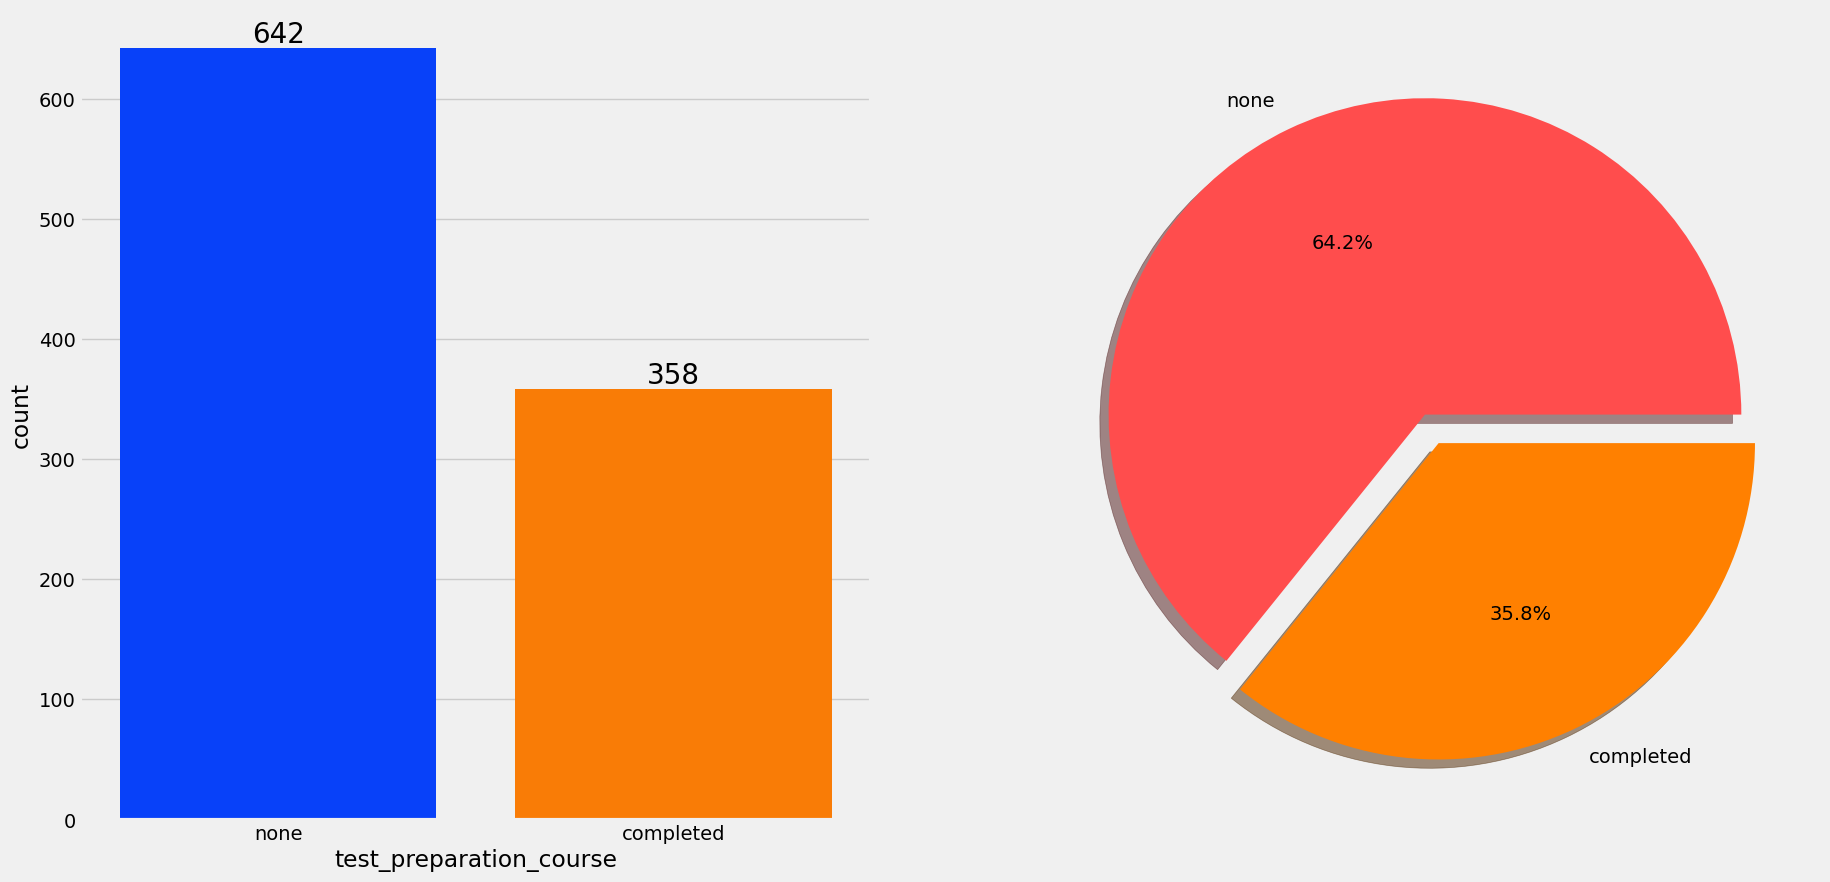

In [125]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['test_preparation_course'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().index,explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

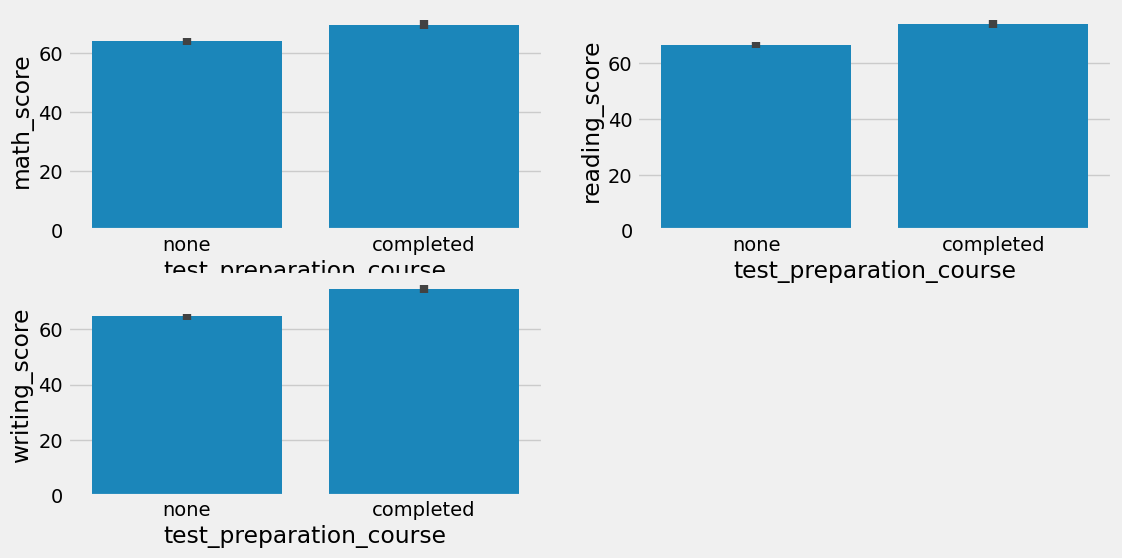

In [130]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'])
plt.subplot(2,2,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'])
plt.subplot(2,2,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'])

<Axes: xlabel='lunch', ylabel='writing_score'>

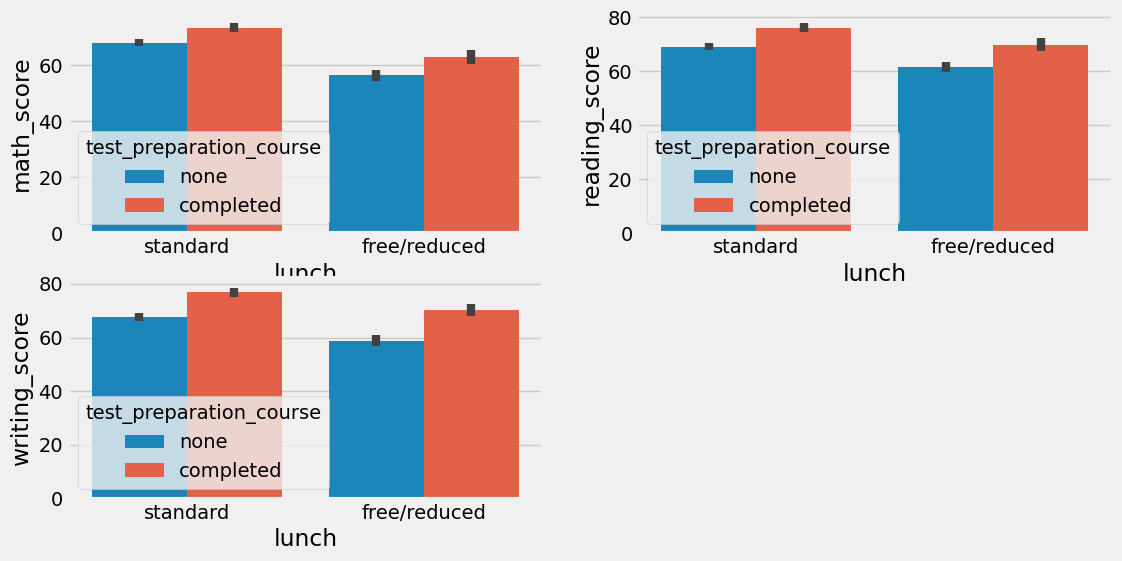

In [131]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

4.4.6 CHECKING OUTLIERS

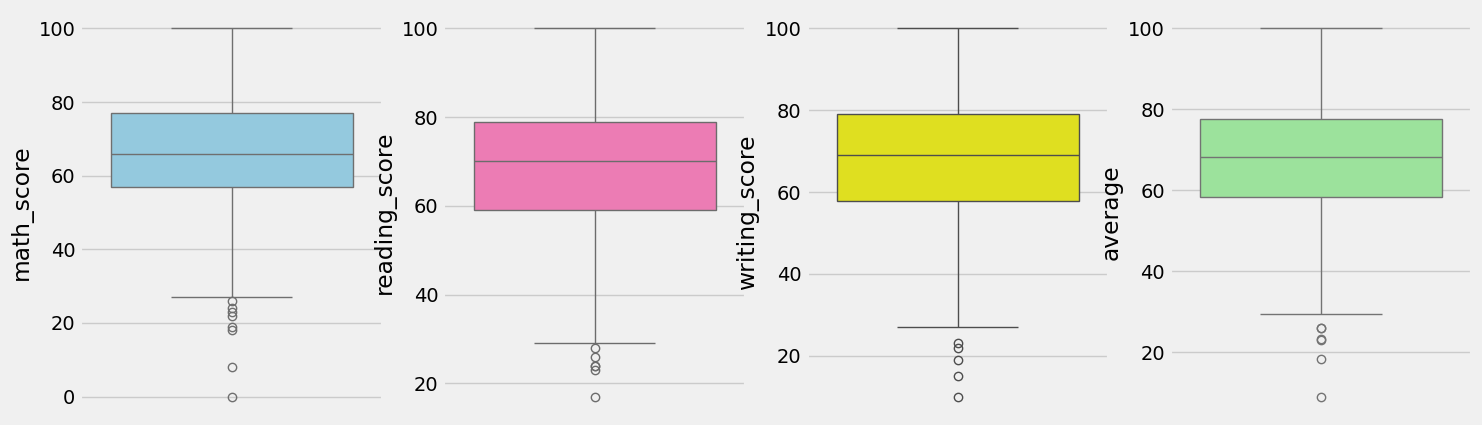

In [134]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

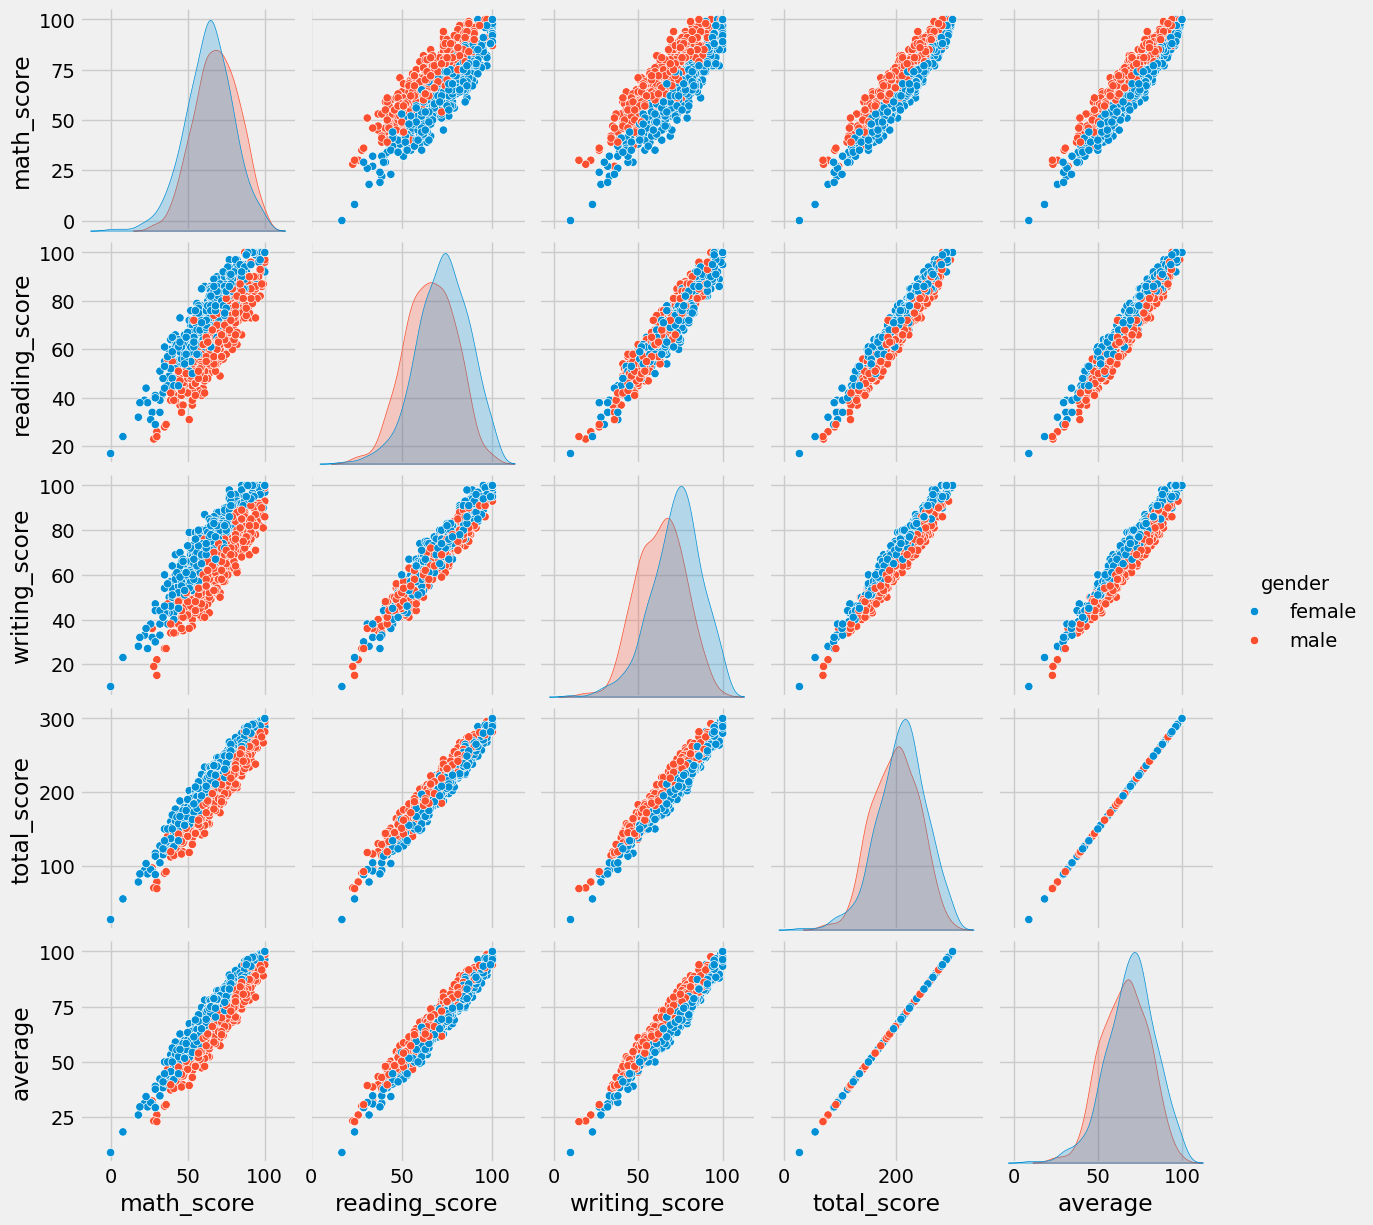

In [135]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
- From the above plot it is clear that all the scores increase linearly with each other.

5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [144]:
!pip uninstall pandas-profiling

^C


In [139]:
!pip install ydata-profiling

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 640.0 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 518.5 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 533.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/357.9 kB ? eta -:--:--
   -------- ------------------------------- 71.7/357.9 kB 2.0 MB/s eta 0:00:01
   ------------------- -------------------- 174.1/357.9 kB 2.1 MB/s eta 0:00:01
   ------------------------------ --------- 276.5/357.9 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 357.9/357.9 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------ --------------------------------- 0.4/2.6 MB 24.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.7/2.6 MB 8.9 MB/s eta 0:00:01
   -

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


In [142]:
!pip install ipywidgets

   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -------- ------------------------------ 30.7/139.4 kB 262.6 kB/s eta 0:00:01
   ----------- --------------------------- 41.0/139.4 kB 245.8 kB/s eta 0:00:01
   ----------------- --------------------- 61.4/139.4 kB 328.2 kB/s eta 0:00:01
   ------------------------------ ------- 112.6/139.4 kB 469.7 kB/s eta 0:00:01
   ------------------------------------ - 133.1/139.4 kB 491.5 kB/s eta 0:00:01
   -------------------------------------- 139.4/139.4 kB 459.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/215.0 kB ? eta -:--:--
   ---------------------- ----------------- 122.9/215.0 kB 2.4 MB/s eta 0:00:01
   -------------------------------- ------- 174.1/215.0 kB 2.6 MB/s eta 0:00:01
   ------------------------------------ --- 194.6/215.0 kB 1.3 MB/s eta 0:

In [143]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]


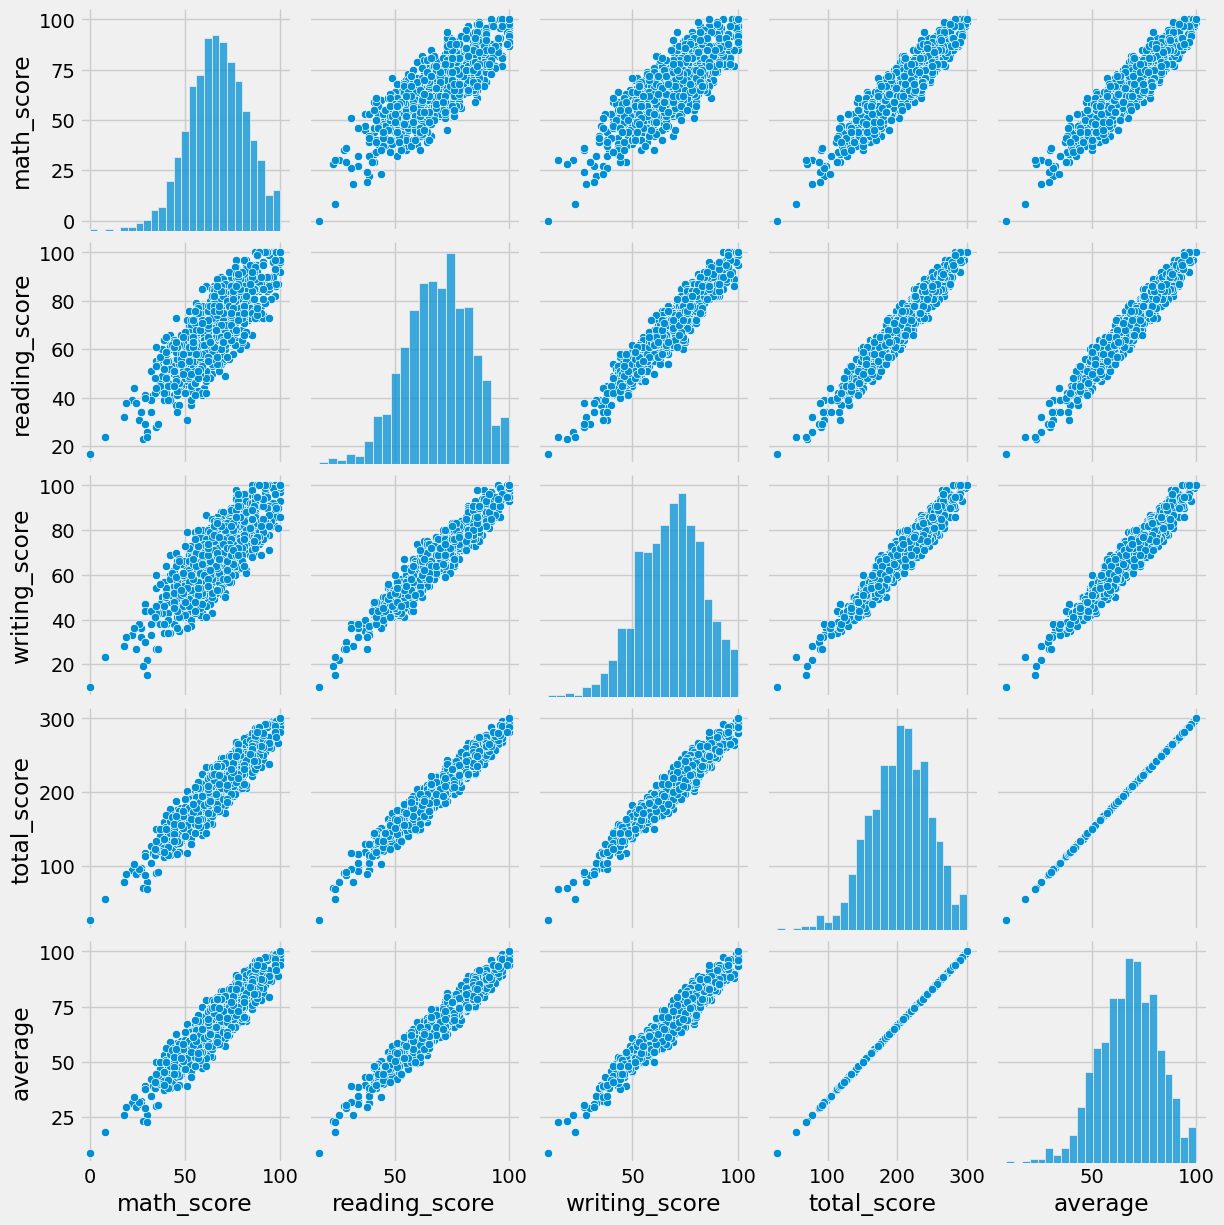

In [136]:
sns.pairplot(df)